In [23]:
%load_ext autoreload
%autoreload 2
from bench_result import *
paper_path = "/home/aoli/repos/fray-paper/figs"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


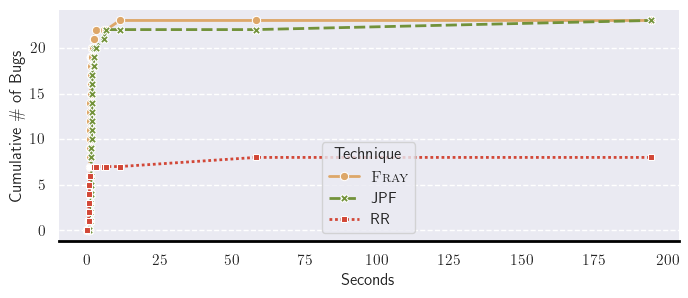

In [24]:
suite = BenchmarkSuite("/home/aoli/repos/sfuzz-benchmark/output/eval-1/sctbench")
ax = suite.to_aggregated_fig("time")
fig = ax.get_figure()
fig.savefig(f"{paper_path}/sctbench-time.pdf", bbox_inches='tight')

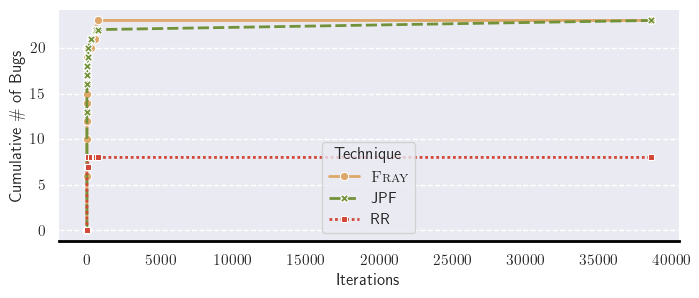

In [25]:
suite = BenchmarkSuite("/home/aoli/repos/sfuzz-benchmark/output/eval-1/sctbench")
ax = suite.to_aggregated_fig("iter")
fig = ax.get_figure()
fig.savefig(f"{paper_path}/sctbench-iter.pdf", bbox_inches='tight')

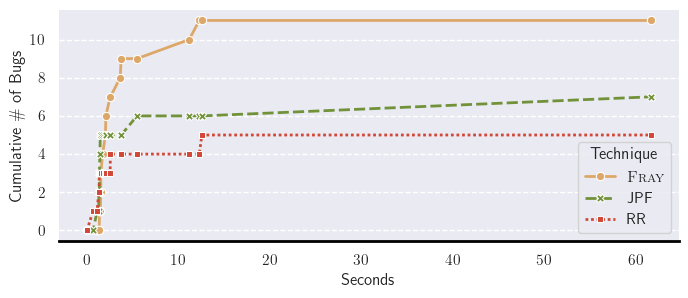

In [26]:
suite = BenchmarkSuite("/home/aoli/repos/sfuzz-benchmark/output/eval-1/jacontebe")
ax = suite.to_aggregated_fig("time")
fig = ax.get_figure()
fig.savefig(f"{paper_path}/jacontebe-time.pdf", bbox_inches='tight')

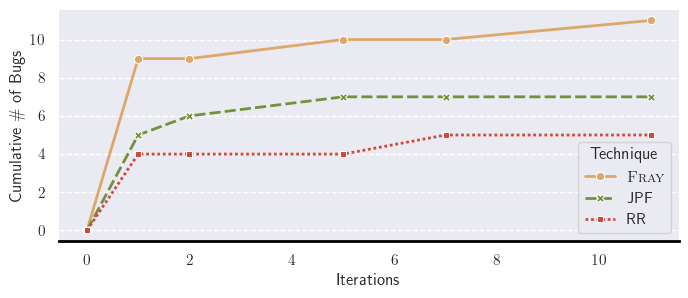

In [27]:
suite = BenchmarkSuite("/home/aoli/repos/sfuzz-benchmark/output/eval-1/jacontebe")
ax = suite.to_aggregated_fig("iter")
fig = ax.get_figure()
fig.savefig(f"{paper_path}/jacontebe-iter.pdf", bbox_inches='tight')